In [ ]:
# %tensorflow_version 1.x

# Steps to solve Emergency vs Non-Emergency vehicle classification problem using Image Augmentation

<ol>1. Loading and pre-processing the dataset</ol>
<ol>2. Creating training and validation set</ol>
<ol>3. Augmenting Images</ol>
<ol>4. Defining the model architecture</ol>
<ol>5. Training the model</ol>
<ol>6. Evaluating model performance</ol>

## 1. Loading and pre-processing the dataset

In [1]:
# importing the libraries
import pandas as pd
import numpy as np
from skimage.io import imread
from tqdm import tqdm # provides a progress bar
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# libraries for performing image augmentation tasks
from skimage.transform import rotate
from skimage.util import random_noise
from skimage.filters import gaussian
from skimage.transform import AffineTransform, warp

In [5]:
# from google.colab import drive
# drive.mount('/content/drive')

In [1]:
# !unzip /content/drive/My\ Drive/Dataset.zip

In [3]:
# reading the csv file
data = pd.read_csv('../data/emergency_classification.csv')

In [4]:
# create random number generator
seed = 42

In [5]:
# load images and store it in numpy array

# empty list to store the images
X = []
# iterating over each image
for img_name in data.image_names:
    # loading the image using its name
    img = plt.imread('../data/images_vehicles/' + img_name)
    # normalizing the pixel values
    img = img/255
    # saving each image in the list
    X.append(img)
    
# converting the list of images into array
X=np.array(X)

# storing the target variable in separate variable
y = data.emergency_or_not.values

In [6]:
# shape of original dataset
X.shape, y.shape

((2352, 224, 224, 3), (2352,))

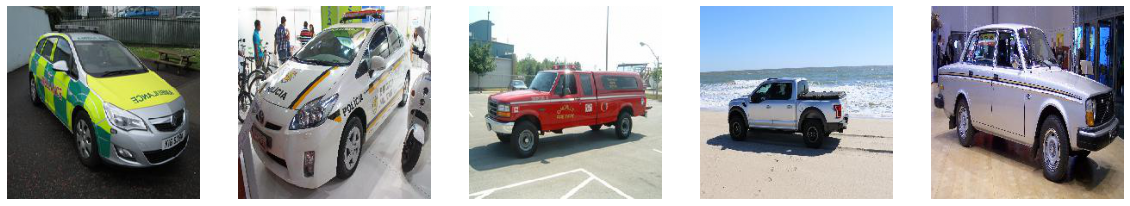

In [7]:
# visualizing images
fig,ax = plt.subplots(nrows=1,ncols=5,figsize=(20,20))
for i in range(5):
    ax[i].imshow(X[i*400])
    ax[i].axis('off')

## 2. Creating training and validation set

In [8]:
# creating a training and validation set
X_train, X_valid, y_train, y_valid=train_test_split(X,y,test_size=0.3, random_state=seed)

In [9]:
# shape of training and validation set
(X_train.shape, y_train.shape), (X_valid.shape, y_valid.shape)

(((1646, 224, 224, 3), (1646,)), ((706, 224, 224, 3), (706,)))

## 3. Augmenting Images

In [10]:
# augmenting the training images
final_train_data = []
final_target_train = []
for i in tqdm(range(X_train.shape[0])):
    # original image
    final_train_data.append(X_train[i])
    # image rotation
    final_train_data.append(rotate(X_train[i], angle=30, mode = 'edge'))
    # image flipping (left-to-right)    
    final_train_data.append(np.fliplr(X_train[i]))
    # image flipping (up-down) 
    final_train_data.append(np.flipud(X_train[i]))
    # image noising
    final_train_data.append(random_noise(X_train[i],var=0.2))
    for j in range(5):
        final_target_train.append(y_train[i]) # since the images are the same just transformed, their target value is the same as the original

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1646/1646 [00:32<00:00, 50.67it/s]


In [11]:
# converting images and target to array
final_train = np.array(final_train_data)
final_target_train = np.array(final_target_train)

In [12]:
# shape of new training set
final_train.shape, final_target_train.shape 

((8230, 224, 224, 3), (8230,))

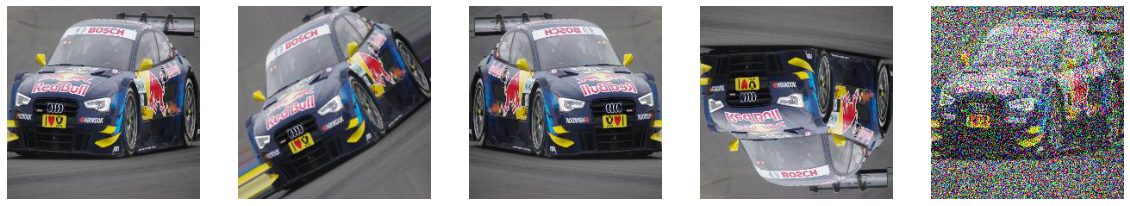

In [13]:
# visualizing the augmented images
fig,ax = plt.subplots(nrows=1,ncols=5,figsize=(20,20))
for i in range(5):
    ax[i].imshow(final_train[i+30])
    ax[i].axis('off')

In [14]:
# converting 3 dimensional image to 1 dimensional image
final_train = final_train.reshape(final_train.shape[0], 224*224*3)
final_train.shape

(8230, 150528)

In [15]:
# minimum and maximum pixel values of training images
final_train.min(), final_train.max()

(0.0, 1.0)

In [16]:
# converting 3 dimensional validation image to 1 dimensional image
final_valid = X_valid.reshape(X_valid.shape[0], 224*224*3)
final_valid.shape

(706, 150528)

In [17]:
# minimum and maximum pixel values of validation images
final_valid.min(), final_valid.max()

(0.0, 1.0)

## 4. Defining the model architecture

In [18]:
# importing functions from keras to define the neural network architecture
from keras.layers import Dense, InputLayer, Dropout, BatchNormalization
from keras.models import Sequential
# importing adam optimizer from keras optimizer module 
from keras.optimizers import Adam

In [19]:
# defining the adam optimizer and setting the learning rate as 10^-5
adam = Adam(lr=1e-5)

In [20]:
# defining and compiling the model architecture
model=Sequential()

model.add(InputLayer(input_shape=(224*224*3,)))
model.add(Dense(100, activation='sigmoid'))
model.add(BatchNormalization())
model.add(Dropout(rate=0.5))
model.add(Dense(100, activation='sigmoid'))
model.add(BatchNormalization())
model.add(Dropout(rate=0.5))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

In [21]:
# summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               15052900  
_________________________________________________________________
batch_normalization (BatchNo (None, 100)               400       
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
batch_normalization_1 (Batch (None, 100)               400       
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 1

## 5. Training the model

In [22]:
# training the model
model_history = model.fit(final_train, final_target_train, epochs=50, batch_size=128,validation_data=(final_valid,y_valid))

Epoch 1/50
65/65 [==============================] - 20s 303ms/step - loss: 0.8789 - accuracy: 0.5802 - val_loss: 0.6715 - val_accuracy: 0.6643s - loss: 0.8972 - accuracy:  - ETA: 3s - loss: 0.8890 - accuracy - ETA: 2s - loss: 0.8824 -  - ETA: 0s - loss: 0.8785 - accuracy
Epoch 2/50
65/65 [==============================] - 14s 210ms/step - loss: 0.7759 - accuracy: 0.6355 - val_loss: 0.6502 - val_accuracy: 0.6785- los - ETA: 2s - l
Epoch 3/50
65/65 [==============================] - 11s 175ms/step - loss: 0.7319 - accuracy: 0.6553 - val_loss: 0.6282 - val_accuracy: 0.6558
Epoch 4/50
65/65 [==============================] - 10s 160ms/step - loss: 0.6794 - accuracy: 0.6853 - val_loss: 0.6552 - val_accuracy: 0.5822
Epoch 5/50
65/65 [==============================] - 9s 145ms/step - loss: 0.6394 - accuracy: 0.7036 - val_loss: 0.5808 - val_accuracy: 0.6785
Epoch 6/50
65/65 [==============================] - 10s 148ms/step - loss: 0.6322 - accuracy: 0.7103 - val_loss: 0.5913 - val_accuracy: 0.

## 6. Evaluating model performance

In [23]:
# accuracy on validation set
print('Accuracy on validation set:', accuracy_score(y_valid, model.predict_classes(final_valid)[:, 0]), '%')

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
Accuracy on validation set: 0.6869688385269122 %


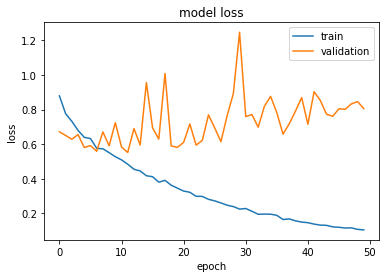

In [24]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

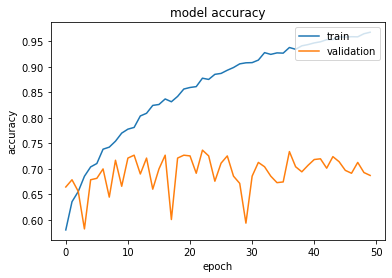

In [27]:
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()